# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Wrangling</a></div><div class="lev2 toc-item"><a href="#Dataframes" data-toc-modified-id="Dataframes-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataframes</a></div><div class="lev3 toc-item"><a href="#Indices" data-toc-modified-id="Indices-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Indices</a></div><div class="lev3 toc-item"><a href="#Group-by,-aggregate" data-toc-modified-id="Group-by,-aggregate-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Group by, aggregate</a></div><div class="lev3 toc-item"><a href="#Ordenar" data-toc-modified-id="Ordenar-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Ordenar</a></div><div class="lev3 toc-item"><a href="#Merge" data-toc-modified-id="Merge-114"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Merge</a></div><div class="lev4 toc-item"><a href="#Tablas-relacionales" data-toc-modified-id="Tablas-relacionales-1141"><span class="toc-item-num">1.1.4.1&nbsp;&nbsp;</span>Tablas relacionales</a></div><div class="lev3 toc-item"><a href="#Split-apply-combine" data-toc-modified-id="Split-apply-combine-115"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Split-apply-combine</a></div><div class="lev3 toc-item"><a href="#Pivot" data-toc-modified-id="Pivot-116"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Pivot</a></div><div class="lev3 toc-item"><a href="#Graficar-con-pandas" data-toc-modified-id="Graficar-con-pandas-117"><span class="toc-item-num">1.1.7&nbsp;&nbsp;</span>Graficar con pandas</a></div><div class="lev3 toc-item"><a href="#query" data-toc-modified-id="query-118"><span class="toc-item-num">1.1.8&nbsp;&nbsp;</span>query</a></div><div class="lev3 toc-item"><a href="#Assign" data-toc-modified-id="Assign-119"><span class="toc-item-num">1.1.9&nbsp;&nbsp;</span>Assign</a></div><div class="lev2 toc-item"><a href="#Iterar-sobre-dataframe" data-toc-modified-id="Iterar-sobre-dataframe-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Iterar sobre dataframe</a></div><div class="lev3 toc-item"><a href="#Apply" data-toc-modified-id="Apply-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Apply</a></div><div class="lev2 toc-item"><a href="#Wrap-up" data-toc-modified-id="Wrap-up-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Wrap-up</a></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Wrangling

Usaremos datos publicados en [datos.gob.mx](datos.gob.mx):
* [Estadística de Pasajeros de los Aeropuertos de la Red ASA](https://datos.gob.mx/busca/dataset/estadistica-de-pasajeros-de-los-aeropuertos-de-la-red-asa)
* [Estadística de Operaciones de los Aeropuertos de la Red ASA](https://datos.gob.mx/busca/dataset/estadistica-de-operaciones-de-los-aeropuertos-de-la-red-asa)

Primero los leemos a data frame.

In [2]:
pas = (pd.read_csv(
           'http://www.asa.gob.mx/work/models/ASA/Resource/2008/1/images/ASA_estadisticasPasajeros(22).csv'
       ))

In [ ]:
pas.head(5)

In [3]:
ops = (pd.read_csv(
           'http://www.asa.gob.mx/work/models/ASA/Resource/2008/1/images/ASA_estadisticasOperaciones(22).csv'
       ))

In [ ]:
ops.head(5)

## Dataframes

Los dataframes están constituidos de columnas, que son objetos [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html). Contienen al menos un índice (por default numérico).

En este caso, el índice se leyó como la primera columna (Anio mes).

In [ ]:
pas.index

In [ ]:
pas.reset_index().head(5)

Acceder a nombres de columnas.

In [ ]:
pas.columns

Tanto los índices como las columnas son iterables.

In [ ]:
for col in pas.columns:
    print(col)

### Indices

Usemos dataframes cuyos índices sean numéricos sobre la posición.

In [ ]:
# pas = pas.reset_index()
# ops = ops.reset_index()

In [ ]:
pas[['Codigo IATA', 'Estado']].head(5)

In [ ]:
pas.head(5)

El método `loc` nos ayuda a acceder a renglones y columnas a través de las etiquetas correspondientes.

In [ ]:
pas.loc[0:10, 'Codigo IATA']

In [ ]:
pas.loc[0:10, :]

No podemos acceder por posición.

In [ ]:
pas.loc[0:10, 0:3]

Para acceder por posición se usa `iloc`.

In [ ]:
pas.iloc[0:10, 0:3]

Un ejemplo donde esto hace la diferencia es cuando hemos filtrado un dataframe. Los índices ya no empiezan en cero, porque el cero se filtró.

In [ ]:
pas['Codigo IATA'] == 'MAM'

In [ ]:
pas_mam = pas[pas['Codigo IATA'] == 'MAM']
pas_mam.head(5)

In [ ]:
pas_mam.iloc[0:5, :]

In [ ]:
pas_mam.loc[0, :]

In [ ]:
pas.head(5)

In [ ]:
pas_aux = pas.head(5)

El índice pueden ser otras cosas.

In [ ]:
pas_aux.index = pas_aux['Anio mes']

In [ ]:
pas_aux.loc[201501,:]

**Ejercicio**: Filtra los datos del estado de Sonora e imprime 10 datos a partir del segundo renglón.

In [ ]:
pas[pas.Estado == 'Sonora'].iloc[1:11,:]

### Group by, aggregate

In [ ]:
pas.columns

In [ ]:
pas.groupby('Estado')

In [ ]:
print(min(pas['Anio mes']), max(pas['Anio mes']))

In [ ]:
pas.head(5)

In [ ]:
pas.groupby('Estado')['Pasajeros nacionales']

In [ ]:
pas.groupby('Estado')['Pasajeros nacionales'].sum()

In [ ]:
pas.groupby('Anio mes')['Pasajeros nacionales'].count()

In [ ]:
pas.groupby('Estado').head(1)

In [ ]:
pas.groupby('Estado').aggregate(np.sum)

In [ ]:
aggr = pas.groupby('Estado').aggregate([np.sum, np.std]).head(3)
aggr

In [ ]:
aggr.columns

**Ejercicio**: Imprime las primeras 3 IATAs por año.

In [ ]:
pas['anio'] = (pas['Anio mes']/100).astype(int)
pas.groupby('anio')[['anio', 'Codigo IATA']].head(3)

### Ordenar
Para ordenar el data frame según una columna, usamos `sort_values`.

In [ ]:
pas.sort_values(by = 'Estado').head(5)

In [ ]:
pas.sort_values(by = ['Estado', 'Pasajeros nacionales']).head(10)

In [ ]:
pas.Estado.unique()

In [ ]:
pas.sort_values(by = ['Estado', 'Pasajeros nacionales'],
               ascending = [True, False]).head(5)

**Ejercicio**: Encuentra las 5 IATAs con mayor número de pasajeros internacionales.

In [ ]:
(
     pas.
     groupby('Codigo IATA')['Pasajeros internacionales'].
     sum().
     reset_index().
     sort_values(by = 'Pasajeros internacionales',
                ascending = False).
     head(5)
)

In [ ]:
(pas.
 groupby('Codigo IATA')['Pasajeros internacionales'].
 sum().
 sort_values(ascending=False).
 head(5)
)

In [ ]:
(
    pas
    .groupby('Codigo IATA')['Pasajeros internacionales']
    .sum()
    .sort_values(ascending = False)
    .head(5)
)

In [ ]:
(
    pas
    .groupby(['anio', 'Codigo IATA'])['Pasajeros nacionales']
    .sum()
    .sort_values(ascending = False)
    .reset_index()
    .groupby('anio')
    .head(3)
    .sort_values(by = ['anio', 'Pasajeros nacionales'], ascending = [True, False])
)

### Merge

Usando el método `merge` podemos juntar dos dataframes.

In [4]:
pas.head(3)

,Anio mes,Codigo IATA,Descripcion,Estado,Pasajeros nacionales,Pasajeros internacionales
0,201501,CEN,Ciudad Obregon,Sonora,17149,721
1,201501,CLQ,Colima,Colima,8486,124
2,201501,CME,Ciudad del Carmen,Campeche,56079,3126


In [5]:
ops.head(3)

,Anio mes,Codigo IATA,Descripcion,Estado,Operaciones nacionales,Operaciones internacionales
0,201501,CEN,Ciudad Obregon,Sonora,730,137
1,201501,CLQ,Colima,Colima,468,0
2,201501,CME,Ciudad del Carmen,Campeche,4750,83


In [6]:
pas.merge(ops).head(5)

,Anio mes,Codigo IATA,Descripcion,Estado,Pasajeros nacionales,Pasajeros internacionales,Operaciones nacionales,Operaciones internacionales
0,201501,CEN,Ciudad Obregon,Sonora,17149,721,730,137
1,201501,CLQ,Colima,Colima,8486,124,468,0
2,201501,CME,Ciudad del Carmen,Campeche,56079,3126,4750,83
3,201501,CPE,Campeche,Campeche,13264,215,398,10
4,201501,CTM,Chetumal,Quintana Roo,13153,0,338,0


Por default, se une por las columnas que tienen nombres comunes, pero podríamos especificar.

In [7]:
pas.merge(ops, on='Anio mes').head(5)

,Anio mes,Codigo IATA_x,Descripcion_x,Estado_x,Pasajeros nacionales,Pasajeros internacionales,Codigo IATA_y,Descripcion_y,Estado_y,Operaciones nacionales,Operaciones internacionales
0,201501,CEN,Ciudad Obregon,Sonora,17149,721,CEN,Ciudad Obregon,Sonora,730,137
1,201501,CEN,Ciudad Obregon,Sonora,17149,721,CLQ,Colima,Colima,468,0
2,201501,CEN,Ciudad Obregon,Sonora,17149,721,CME,Ciudad del Carmen,Campeche,4750,83
3,201501,CEN,Ciudad Obregon,Sonora,17149,721,CPE,Campeche,Campeche,398,10
4,201501,CEN,Ciudad Obregon,Sonora,17149,721,CTM,Chetumal,Quintana Roo,338,0


#### Tablas relacionales
Se juntan por una o más llaves
Tipos de join:
* left
* right
* outer
* inner

Por default, pandas usa inner

In [26]:
A = pd.DataFrame({'llave1': [1, 2, 3, 2, 7],
                  'var_a': ['uno', 'dos', 'tres', 'dos', 'siete']})
B = pd.DataFrame({'llave1': [1, 4, 10, 2, 3],
                  'var_b': ['uno', 'cuatro', 'diez', 'dos', 'tres']})
A

,llave1,var_a
0,1,uno
1,2,dos
2,3,tres
3,2,dos
4,7,siete


In [28]:
B

,llave1,var_b
0,1,uno
1,4,cuatro
2,10,diez
3,2,dos
4,3,tres


In [29]:
A.merge(B, how='inner')

,llave1,var_a,var_b
0,1,uno,uno
1,2,dos,dos
2,2,dos,dos
3,3,tres,tres


In [30]:
A.merge(B, how='left')

,llave1,var_a,var_b
0,1,uno,uno
1,2,dos,dos
2,3,tres,tres
3,2,dos,dos
4,7,siete,NaN


In [31]:
A.merge(B, how='right')

,llave1,var_a,var_b
0,1,uno,uno
1,2,dos,dos
2,2,dos,dos
3,3,tres,tres
4,4,NaN,cuatro
5,10,NaN,diez


In [32]:
A.merge(B, how='outer')

,llave1,var_a,var_b
0,1,uno,uno
1,2,dos,dos
2,2,dos,dos
3,3,tres,tres
4,7,siete,NaN
5,4,NaN,cuatro
6,10,NaN,diez


### Split-apply-combine

**Ejercicio**: Encuentra las operaciones nacionales por mes de los 3 códigos IATA con mayor número de pasajeros internacionales.

In [44]:
(
    pas
    .groupby('Codigo IATA')['Pasajeros internacionales']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .reset_index()
    .merge(ops)[['Anio mes', 'Codigo IATA', 'Operaciones nacionales']]
).head(5)

,Anio mes,Codigo IATA,Operaciones nacionales
0,201501,PBC,1577
1,201502,PBC,1445
2,201503,PBC,1654
3,201504,PBC,1178
4,201505,PBC,1320


In [45]:
pas['anio'] = (pas['Anio mes']/100).astype(int)
ops['anio'] = (ops['Anio mes']/100).astype(int)

**Ejercicio**: Número de pasajeros internacionales por Año de los 3 códigos IATA que tuvieron el número máximo de operaciones nacionales en ese año.

In [78]:
(
    ops
    .groupby(['anio', 'Codigo IATA'])['Operaciones nacionales']
    .max()
    .sort_values(ascending=False)
    .groupby('anio')
    .head(3)
    .reset_index()[['anio', 'Codigo IATA']]
    .merge(pas)
    .groupby(['anio', 'Codigo IATA'])['Pasajeros internacionales']
    .sum()
    .reset_index()
)

,anio,Codigo IATA,Pasajeros internacionales
0,2015,CEN,7083
1,2015,CME,32000
2,2015,PBC,63056
3,2016,CME,18027
4,2016,PBC,57530
5,2016,TPQ,0
6,2017,CME,4780
7,2017,PBC,32107
8,2017,PXM,2301


In [ ]:
(
    pas.
    groupby('Codigo IATA')['Pasajeros internacionales'].
    sum().
    sort_values(ascending = False).
    head(3).
    reset_index().
    merge(ops)[['Anio mes', 'Operaciones nacionales', 'Codigo IATA']]
)

### Pivot

In [79]:
nac_estado = (
    pas.
    groupby(['Estado','Anio mes'])['Pasajeros nacionales'].
    sum().
    reset_index()
)
nac_estado.head(5)

,Estado,Anio mes,Pasajeros nacionales
0,Baja California Sur,201501,1050
1,Baja California Sur,201502,651
2,Baja California Sur,201503,793
3,Baja California Sur,201504,1708
4,Baja California Sur,201505,884


In [81]:
tabla_estados = nac_estado.pivot(index='Anio mes', 
                                 columns='Estado', 
                                 values='Pasajeros nacionales')

tabla_estados.head(5)

Estado,Baja California Sur,Campeche,Colima,Michoacan,Nayarit,Oaxaca,Puebla,Quintana Roo,San Luis Potosi,Sonora,Tamaulipas,Veracruz
Anio mes,,,,,,,,,,,,
201501,1050,69343,8486,8227,8116,16754,20947,13153,108,18721,16988,4490
201502,651,61052,9207,5581,7062,11146,16566,11110,205,16634,16886,5368
201503,793,66196,8906,6588,8953,15527,21917,13651,172,21737,21451,5756
201504,1708,60923,8698,6993,8664,15547,22197,14271,89,21241,18773,5410
201505,884,64755,8827,7589,9437,11401,22381,13762,158,21419,19075,5130


In [82]:
(
    pas.
    groupby(['Codigo IATA', 'Anio mes'])['Pasajeros nacionales'].
    sum().
    reset_index().
    pivot(
        index='Anio mes',
        columns='Codigo IATA',
        values='Pasajeros nacionales'
    )
).head(3)

Codigo IATA,CEN,CLQ,CME,CPE,CTM,CVM,GYM,IZT,LTO,MAM,NLD,NOG,PAZ,PBC,PXM,TCN,TPQ,TSL,UPN
Anio mes,,,,,,,,,,,,,,,,,,,
201501,17149.0,8486.0,56079.0,13264.0,13153.0,4695.0,1315.0,NaN,1050.0,6684.0,5609.0,257.0,4490.0,20794.0,16754.0,153.0,8116.0,108.0,8227.0
201502,15430.0,9207.0,48255.0,12797.0,11110.0,4902.0,1000.0,NaN,651.0,6443.0,5541.0,204.0,5368.0,16316.0,11146.0,250.0,7062.0,205.0,5581.0
201503,20272.0,8906.0,50333.0,15863.0,13651.0,8116.0,1170.0,NaN,793.0,7219.0,6116.0,295.0,5756.0,21621.0,15527.0,296.0,8953.0,172.0,6588.0


In [92]:
mes = tabla_estados.index - (tabla_estados.index/100).astype(int)*100
mes

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
             6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7],
           dtype='int64', name='Anio mes')

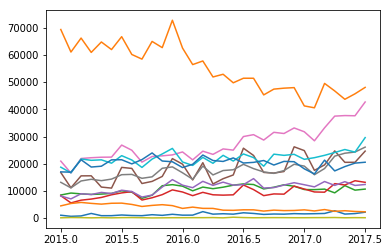

In [93]:
mes = tabla_estados.index - (tabla_estados.index/100).astype(int)*100
anio = (tabla_estados.index/100).astype(int)
for col in tabla_estados.columns:
    plt.plot(anio + (mes - 1)/12, tabla_estados[col])

plt.show()

**Ejercicio grupal**: ¿Cómo hacemos que esta gráfica se vea bien?

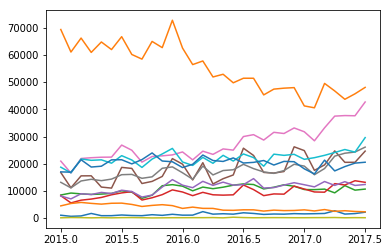

In [95]:
mes_ent = ((nac_estado['Anio mes']/100 - (nac_estado['Anio mes']/100).astype(int))*100 - 1)/12
anio = (nac_estado['Anio mes']/100).astype(int)
nac_estado['Anio_mes'] = anio + mes_ent

tabla_estados_2 = nac_estado.pivot(index='Anio_mes', 
                                   columns='Estado', 
                                   values='Pasajeros nacionales')

for col in tabla_estados_2.columns:
    plt.plot(tabla_estados_2.index, tabla_estados[col])
    
plt.show()

**Ejercicio**: Grafica la evolución de las operaciones totales de las 3 IATAs más importantes para pasajeros internacionales.

In [100]:
ops['Operaciones totales'] = ops['Operaciones nacionales'] + ops['Operaciones internacionales']
ops.head(3)

,Anio mes,Codigo IATA,Descripcion,Estado,Operaciones nacionales,Operaciones internacionales,anio,Operaciones totales
0,201501,CEN,Ciudad Obregon,Sonora,730,137,2015,867
1,201501,CLQ,Colima,Colima,468,0,2015,468
2,201501,CME,Ciudad del Carmen,Campeche,4750,83,2015,4833


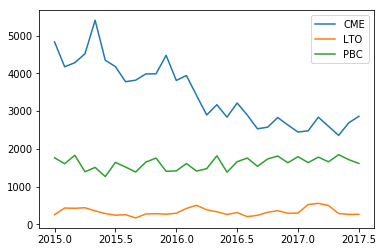

In [117]:
ops_tot = (
    pas
    .groupby('Codigo IATA')['Pasajeros internacionales']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .reset_index()
    .merge(ops)[['Anio mes', 'Codigo IATA', 'Operaciones totales']]
    .pivot(index='Anio mes',
          columns='Codigo IATA',
          values='Operaciones totales')
)

ops_tot['anio_mes'] = (ops_tot.index/100).astype(int) + (((ops_tot.index)-(ops_tot.index/100).astype(int)*100)-1)/12
ops_tot.index = ops_tot.anio_mes
ops_tot = ops_tot.drop('anio_mes', axis = 1)

for col in ops_tot.columns:
    plt.plot(ops_tot.index, ops_tot[col], label=col)
plt.legend()
plt.show()

In [ ]:
mes_ent = ((ops['Anio mes']/100 - (ops['Anio mes']/100).astype(int))*100 - 1)/12
anio = (ops['Anio mes']/100).astype(int)
ops['Anio_mes'] = anio + mes_ent
ops['Operaciones totales'] = ops['Operaciones nacionales'] + ops['Operaciones internacionales']

ops_top_iata = (pas.
 groupby('Codigo IATA')['Pasajeros internacionales'].
 sum().
 sort_values(ascending=False).
 head(3).
 reset_index().
 merge(ops).
 pivot(index='Anio_mes',
       columns='Codigo IATA',
       values='Operaciones totales')
)

for col in ops_top_iata.columns:
    plt.plot(ops_top_iata.index, ops_top_iata[col], label=col)
    
plt.legend()
plt.show()

In [ ]:
ops_top_iata = (
    pas.
    groupby('Codigo IATA')['Pasajeros internacionales'].
    sum().
    sort_values(ascending=False).
    head(3).
    reset_index().
    merge(ops)
)

ops_top_iata['anio'] = (ops_top_iata['Anio mes']/100).astype(int)
ops_top_iata['mes'] = ops_top_iata['Anio mes'] - ops_top_iata['anio']*100
ops_top_iata['anio_mes'] = ops_top_iata['anio'] + (ops_top_iata['mes'] - 1)/12

ops_top_iata['op_tot'] = ops_top_iata['Operaciones nacionales'] + ops_top_iata['Operaciones internacionales']

graf_iata = (
    ops_top_iata[['anio_mes', 'op_tot', 'Codigo IATA']].
    pivot(
        index='anio_mes',
        columns='Codigo IATA',
        values='op_tot'
    )
)

for col in graf_iata.columns:
    plt.plot(graf_iata.index, graf_iata[col])

plt.show()

In [ ]:
tabla_estados.index

In [ ]:
tabla_estados_aux = tabla_estados.reset_index()
tabla_estados_aux['anio'] = (tabla_estados_aux['Anio mes']/100).astype(int)
tabla_estados_aux['mes'] = tabla_estados_aux['Anio mes'] - tabla_estados_aux['anio']*100
tabla_estados_aux['anio_mes'] = tabla_estados_aux['anio'] + (tabla_estados_aux['mes'] - 1)/12
tabla_estados_aux.index = tabla_estados_aux['anio_mes']
tabla_estados_aux = tabla_estados_aux.drop(['anio', 'mes', 'Anio mes', 'anio_mes'], axis=1)

In [ ]:
for col in tabla_estados_aux.columns:
    plt.plot(tabla_estados_aux.index, tabla_estados_aux[col])

plt.show()

In [ ]:
tabla_estados_aux.head(5)

### Graficar con pandas
Pandas tiene una interfaz sencilla con matplotlib.

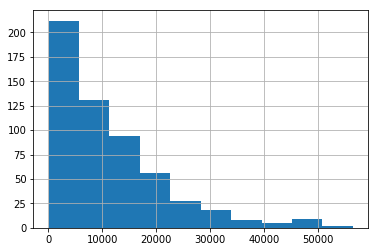

In [118]:
pas['Pasajeros nacionales'].hist()
plt.show()

In [119]:
ops.head(5)

,Anio mes,Codigo IATA,Descripcion,Estado,Operaciones nacionales,Operaciones internacionales,anio,Operaciones totales
0,201501,CEN,Ciudad Obregon,Sonora,730,137,2015,867
1,201501,CLQ,Colima,Colima,468,0,2015,468
2,201501,CME,Ciudad del Carmen,Campeche,4750,83,2015,4833
3,201501,CPE,Campeche,Campeche,398,10,2015,408
4,201501,CTM,Chetumal,Quintana Roo,338,0,2015,338


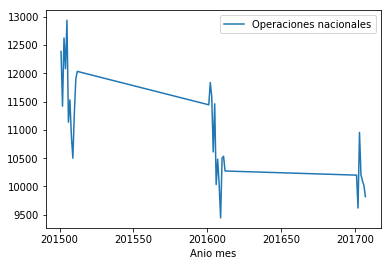

In [120]:
(
    ops.
    groupby('Anio mes')['Operaciones nacionales'].
    sum().
    reset_index().
    plot(x='Anio mes', y='Operaciones nacionales')
)
plt.show()

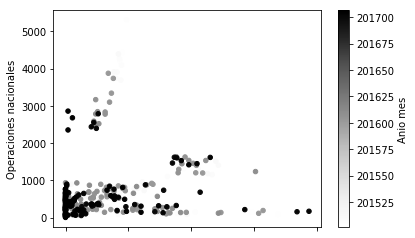

In [121]:
(
    ops.
    plot(x='Operaciones internacionales', 
         y='Operaciones nacionales', 
         kind='scatter',
         c='Anio mes')
)
plt.show()

Con esto no es necesario iterar sobre las columnas

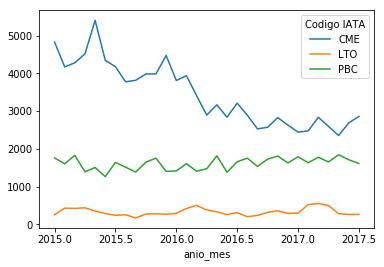

In [123]:
ops_tot.plot()
plt.show()

### query

Con query, podemos seleccionar (filtrar) dentro de un pipeline de pandas. Para eso tenemos que poner la condición dentro de un string.

In [124]:
ops['Anio_mes'] = ops['Anio mes']

In [127]:
ops.query('Anio_mes >= 201700').head(5)

,Anio mes,Codigo IATA,Descripcion,Estado,Operaciones nacionales,Operaciones internacionales,anio,Operaciones totales,Anio_mes
432,201701,CEN,Ciudad Obregon,Sonora,681,214,2017,895,201701
433,201701,CLQ,Colima,Colima,516,0,2017,516,201701
434,201701,CME,Ciudad del Carmen,Campeche,2395,49,2017,2444,201701
435,201701,CPE,Campeche,Campeche,380,2,2017,382,201701
436,201701,CTM,Chetumal,Quintana Roo,434,12,2017,446,201701


In [128]:
ops.query('Anio_mes > 201700 & Estado == "Nayarit"')

,Anio mes,Codigo IATA,Descripcion,Estado,Operaciones nacionales,Operaciones internacionales,anio,Operaciones totales,Anio_mes
447,201701,TPQ,Tepic,Nayarit,603,0,2017,603,201701
465,201702,TPQ,Tepic,Nayarit,667,0,2017,667,201702
483,201703,TPQ,Tepic,Nayarit,764,0,2017,764,201703
502,201704,TPQ,Tepic,Nayarit,653,0,2017,653,201704
521,201705,TPQ,Tepic,Nayarit,765,0,2017,765,201705
540,201706,TPQ,Tepic,Nayarit,658,0,2017,658,201706
559,201707,TPQ,Tepic,Nayarit,456,0,2017,456,201707


Por ahora no se puede si las columnas contienen espacios.

In [161]:
ops.query('Anio_mes > 2017 & Codigo IATA == "UPN"')

SyntaxError: invalid syntax (<unknown>, line 1)

Podemos cambiar los nombres de todas las columnas de `ops` para que en vez de espacios tengan _.

In [130]:
ops.columns = [x.replace(' ', '_') for x in ops.columns]

In [131]:
ops.columns

Index(['Anio_mes', 'Codigo_IATA', 'Descripcion', 'Estado',
       'Operaciones_nacionales', 'Operaciones_internacionales', 'anio',
       'Operaciones_totales', 'Anio_mes'],
      dtype='object')

### Assign

Con el método `assign` podemos crear/modificar columnas sin necesidad de "salirnos" del pipeline.

In [132]:
ops.assign(nueva_variable = 1).head(3)

,Anio_mes,Codigo_IATA,Descripcion,Estado,Operaciones_nacionales,Operaciones_internacionales,anio,Operaciones_totales,Anio_mes,nueva_variable
0,201501,CEN,Ciudad Obregon,Sonora,730,137,2015,867,201501,1
1,201501,CLQ,Colima,Colima,468,0,2015,468,201501,1
2,201501,CME,Ciudad del Carmen,Campeche,4750,83,2015,4833,201501,1


In [133]:
ops.head(3)

,Anio_mes,Codigo_IATA,Descripcion,Estado,Operaciones_nacionales,Operaciones_internacionales,anio,Operaciones_totales,Anio_mes
0,201501,CEN,Ciudad Obregon,Sonora,730,137,2015,867,201501
1,201501,CLQ,Colima,Colima,468,0,2015,468,201501
2,201501,CME,Ciudad del Carmen,Campeche,4750,83,2015,4833,201501


In [ ]:
ops.assign(Anio_mes = 1).head(3)

También podemos computar usando las mismas columnas de dataframe a travén de una función

In [134]:
ops.assign(
    op_tot = lambda x: x['Operaciones_internacionales'] + x['Operaciones_nacionales']).head(3)

,Anio_mes,Codigo_IATA,Descripcion,Estado,Operaciones_nacionales,Operaciones_internacionales,anio,Operaciones_totales,Anio_mes,op_tot
0,201501,CEN,Ciudad Obregon,Sonora,730,137,2015,867,201501,867
1,201501,CLQ,Colima,Colima,468,0,2015,468,201501,468
2,201501,CME,Ciudad del Carmen,Campeche,4750,83,2015,4833,201501,4833


## Iterar sobre dataframe

In [148]:
mini_ops = ops.head(1)
mini_ops

,Anio_mes,Codigo_IATA,Descripcion,Estado,Operaciones_nacionales,Operaciones_internacionales,anio,Operaciones_totales,Anio_mes
0,201501,CEN,Ciudad Obregon,Sonora,730,137,2015,867,201501


In [149]:
for i, row in mini_ops.iterrows():
    print(i)
    print(row)
    print(row['Estado'])

0
Anio_mes                               201501
Codigo_IATA                               CEN
Descripcion                    Ciudad Obregon
Estado                                 Sonora
Operaciones_nacionales                    730
Operaciones_internacionales               137
anio                                     2015
Operaciones_totales                       867
Anio_mes                               201501
Name: 0, dtype: object
Sonora


**Ejercicio**: Crea un diccionario de la forma {'Código IATA': Total de pasajeros nacionales en 2017, ...} para todas las IATAS.

In [ ]:
df_iata = (pas.
           rename(columns={'Pasajeros nacionales': 'pas_nac',
                           'Anio mes': 'anio_mes'}).
           query('anio_mes >= 201701').
           groupby('Codigo IATA')['pas_nac'].
           sum().
           reset_index())

dicc_iata = {}
for i, row in df_iata.iterrows():
    dicc_iata[row['Codigo IATA']] = row['pas_nac']
    
print(dicc_iata)

In [ ]:
pas.columns = [x.replace(' ', '_') for x in pas.columns]
df_dicc = (
    pas.
    query('Anio_mes >= 201700').
    groupby('Codigo_IATA')['Pasajeros_nacionales'].
    sum().
    reset_index()
)

dicc_IATA = {}
for i, row in df_dicc.iterrows():
    dicc_IATA[row['Codigo_IATA']] = row['Pasajeros_nacionales']
    
dicc_IATA

In [171]:
pas_2017 = (
    pas
    .query('anio == 2017')
    .groupby('Codigo IATA')['Pasajeros internacionales']
    .sum()
    .reset_index()
)

dict_iata = {}
for i, row in pas_2017.iterrows():
    dict_iata[row['Codigo IATA']] = row['Pasajeros internacionales']
    
dict_iata

{'CEN': 5769,
 'CLQ': 138,
 'CME': 4780,
 'CPE': 1507,
 'CTM': 254,
 'CVM': 915,
 'GYM': 1876,
 'IZT': 0,
 'LTO': 42657,
 'MAM': 35,
 'NLD': 150,
 'NOG': 166,
 'PAZ': 0,
 'PBC': 32107,
 'PXM': 2301,
 'TCN': 0,
 'TPQ': 0,
 'TSL': 0,
 'UPN': 7523}

In [165]:
pas.head(3)

,Anio mes,Codigo IATA,Descripcion,Estado,Pasajeros nacionales,Pasajeros internacionales,anio
0,201501,CEN,Ciudad Obregon,Sonora,17149,721,2015
1,201501,CLQ,Colima,Colima,8486,124,2015
2,201501,CME,Ciudad del Carmen,Campeche,56079,3126,2015


### Apply

El método apply nos ayuda a aplicar funciones a un Series.

In [152]:
ops['Operaciones_nacionales'].apply(np.exp).head(5)

0              inf
1    1.777532e+203
2              inf
3    7.066491e+172
4    6.187780e+146
Name: Operaciones_nacionales, dtype: float64

Esto es útil cuando tenemos funciones propias que queremos usar.

In [153]:
def corte(numero):
    # Si numero es mayor a 100 entonces regresa verdadero, si no Falso
    if numero > 100:
        return True
    else:
        return False

In [158]:
ops['Operaciones_internacionales'].apply(corte).head(3)

0     True
1    False
2    False
Name: Operaciones_internacionales, dtype: bool

Usando el parámetro  `axis` también podemos aplicar a las columnas, equivalente a la función `agg`.

In [159]:
ops[['Operaciones_nacionales', 'Operaciones_internacionales']].apply([np.sum, np.mean], axis=0)

,Operaciones_nacionales,Operaciones_internacionales
sum,339917.00000,27080.000000
mean,604.83452,48.185053


## Wrap-up

In [ ]:
pas = (pd.DataFrame.
       from_csv(
           'http://www.asa.gob.mx/work/models/ASA/Resource/2008/1/images/ASA_estadisticasPasajeros(22).csv'
       )).reset_index()

ops = (pd.DataFrame.
       from_csv(
           'http://www.asa.gob.mx/work/models/ASA/Resource/2008/1/images/ASA_estadisticasOperaciones(22).csv'
       )).reset_index()

In [ ]:
ops.columns

**Ejercicio**: Encuentra el promedio y desviación estándar anual de operaciones nacionales e internacionales de los dos estados con mayor número de pasajeros internacionales de 2017.

In [ ]:
(
    pas[pas['Anio mes'] >= 201700].
    groupby('Estado')['Pasajeros internacionales'].
    sum().
    sort_values(ascending=False).
    reset_index().
    head(2).
    merge(ops).
    assign(anio = lambda x: (x['Anio mes']/100).astype(int)).
    groupby(['Estado', 'anio'])['Operaciones nacionales', 'Operaciones internacionales'].
    agg([np.mean, np.std])
)